# **TP5** : Thermostat - Molecular Dymanics Laboratory


Maintaining the temperature of the system at a constant value throughout the simulation, as required for canonical ensemble modeling, requires the use of special algorithms called thermostats. These algorithms are necessary to ensure MD simulations are accurate and reliable by carefully controlling the system temperature.

The Anderson uses a stochastic-collision approach. A stochastic process refers to a random process that affects the dynamics of the system. Anderson simulates the random collisions of particles in a thermostat system, which changes the temperature of the system. This algorithm provides a robust method for maintaining random thermodynamic conditions and considers the effect of random thermodynamic fluctuations.



System reached 300 K at step 57022, time 114044.00 a.u.
       Time (t)  Positiion (x)  Velocity (m/s)  Potential Energy  \
0      0.000000      -0.905000        0.001000         -0.069368   
1      2.009709      -0.903000        0.000279         -0.069367   
2      4.019417      -0.902443       -0.000517         -0.069367   
3      6.029126      -0.903478        0.000660         -0.069368   
4      8.038835      -0.902159        0.000285         -0.069367   
..          ...            ...             ...               ...   
202  405.961165      -0.889532       -0.000921         -0.069341   
203  407.970874      -0.891377       -0.001071         -0.069347   
204  409.980583      -0.893523       -0.000368         -0.069353   
205  411.990291      -0.894262       -0.001484         -0.069355   
206  414.000000      -0.897232       -0.000739         -0.069361   

     Kinetic Energy  Total Energy  
0          0.000918     -0.068450  
1          0.000918     -0.068450  
2          0.000071

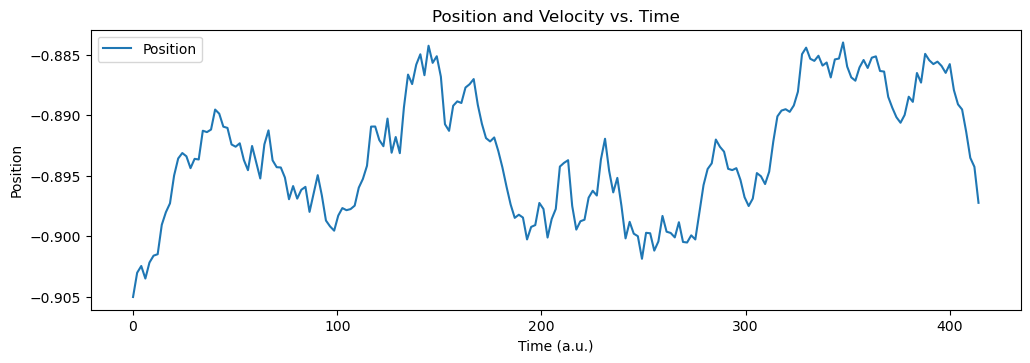

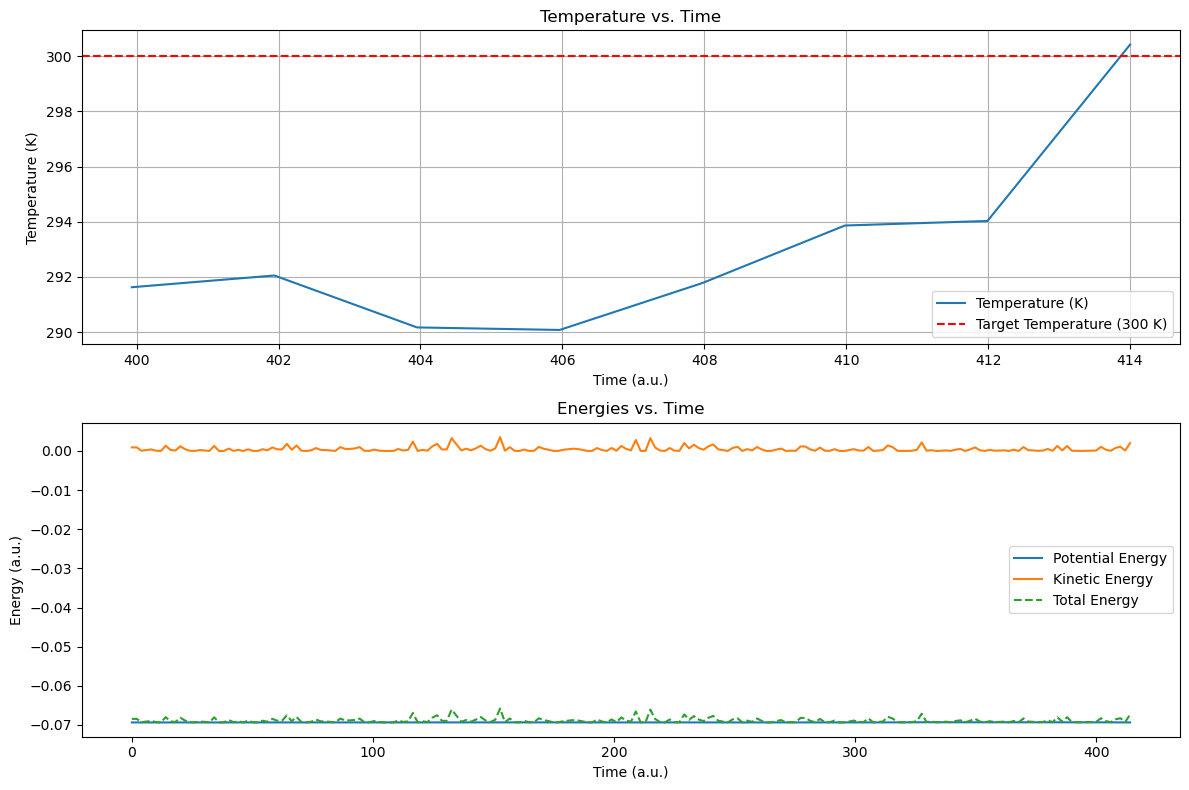

In [211]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def verlet_vel(x, v, accel_func, pot_func, m, dt, n, T_target, gamma):
    
   # Simulation of the velocity Verlet algorithm with energy calculations and a termination condition.
   
    xs = [x] #Initial position
    vs = [v] #Initial velocity
    us = [pot_func(x)] #potential energy with given position
    ks = [0.5 * m * v**2]
    ets = [us[-1] + ks[-1]]
    temp = []
    window_size = 200
    
    for i in range(n):
        # Compute acceleration
        a = accel_func(xs[-1])
        
        # Update position
        x_new = xs[-1] + v * dt + 0.5 * a * dt**2
        
        # Compute acceleration at new position
        a_new = accel_func(x_new)
        
        # Update velocity
        v_new = v + 0.5 * (a + a_new) * dt
        
        # Compute energies
        u = pot_func(x_new)
        k = 0.5 * m * v_new**2
        et = u + k

        # Apply Andersen thermostat
        r_0 = np.random.normal(0, 1)  # Gaussian random number for collision decision
        if abs(r_0) <= gamma * dt:  # Collision occurs
            r_x = np.random.normal(0, 1)  # Gaussian random number for velocity sampling
            v_new = r_x * np.sqrt(k_B * T_target / m)  # Update velocity using Maxwell-Boltzmann distribution
        else:
            continue
        """
        # Calculate moving average of kinetic energy
        if len(ks) >= window_size:
            kinetic_avg = np.convolve(ks, np.ones(window_size)/window_size, mode='valid')[-1]
            T = (2 * kinetic_avg) / k_B  # N=1 dimension
            temp.append(T)
        else:
            temp.append(None)

        ## Check if temperature reaches 300 K (within a tolerance)
        if len(temp) > window_size and abs(temp[-1] - T_target) < 1:
            print(f"System reached {T_target} K at step {i}, time {i * dt:.2f} a.u.")
            break
"""

        # Store results
        xs.append(x_new)
        vs.append(v_new)
        us.append(u)
        ks.append(k)
        ets.append(et)
        #moving_ks.append(k)
        
        # Update for next iteration
        v = v_new

         # Final scalar and array outputs
    kinetic_energy = np.array(ks)
    moving_avg_kinetic = np.convolve(kinetic_energy, np.ones(window_size) / window_size, mode='valid')

    # Compute temperature using the moving average of the kinetic energy
    temp = (2 * moving_avg_kinetic) / (1 * k_B)  # N=1 dimension
    
    time = np.linspace(0, len(xs) * dt, len(xs))
    pos = np.array(xs)
    vel = np.array(vs)
    potE = np.array(us)
    totE = np.array(ets)
    kinE = np.array
    return time, pos, vel, potE, totE, kinE, temp #{"t": np.linspace(0, len(xs)*dt , len(xs)),"x": xs, "v": vs,"u": us,"k": ks, "et": ets,"T": temp}

def pot_func(x):
    #sbh_energy from TP3
    energy_term_1 = 0.5 * (m * omega_1**2 * x**2)
    eta = g_1 * x + e_0
    energy_term_2 = (-1)**1 * np.sqrt(eta**2 + v_0**2)
    E_i = energy_term_1 + energy_term_2
    return E_i

def accel_func(x):
    #sbh_gradient_energy from TP3
    energy_term_1 = (m * omega_1**2 * x)
    eta = g_1 * x + e_0
    energy_term_2 = ((-1)**1) * (g_1 * (eta)/(np.sqrt(eta**2 + v_0**2)))
    dE_i = energy_term_1 + energy_term_2
    return -dE_i * (1/m)

 
# Varaibles from Table 1 - TP3
m = 1836
omega_1 = 0.01136364  
g_1 = 0.22      
e_0 = 0.03674933          
v_0 = 0.03674933

#Variables for TP5
k_B = 3.1668114e-6  # Boltzmann constant in a.u.
T_target = 300  # Temperature in Kelvin
gamma = 0.002  # Collision frequency in a.u.

# Initial conditions
#x0 = 0.917 #R_2
x0 = -0.905 #R_1
#Etot = 0.1 #0.1, 0.15, 0.05, 0.06 used
v0 = 0.001
#v0 = -(2*(Etot)/m)**0.5 # As all kinetic energy equals E_total at R_1
dt = 2
n = 100000 #steps for one picosecond in a.u.

# Running simulation
results = verlet_vel(x0, v0, accel_func, pot_func, m, dt, n, T_target, gamma)

# Convert results to presentable tabulated dataset - pandas library from ChatGPT
data = {
    "Time (t)": results["t"],
    "Positiion (x)": results["x"],
    "Velocity (m/s)": results["v"],
    "Potential Energy": results["u"],
    "Kinetic Energy": results["k"],
    "Total Energy": results["et"],
    #"Temperature": results["T"],
}
df = pd.DataFrame(data)

# Display the pandas table
print(df)


plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(results["t"], results["x"], label="Position")
plt.legend()
plt.xlabel("Time (a.u.)")
plt.ylabel("Position")
plt.title("Position and Velocity vs. Time")


# Plotting results
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.plot(results["t"], results["u"], label="Potential Energy")
plt.plot(results["t"], results["k"], label="Kinetic Energy")
plt.plot(results["t"], results["et"], label="Total Energy", linestyle="--")
plt.legend()
plt.xlabel("Time (a.u.)")
plt.ylabel("Energy (a.u.)")
plt.title("Energies vs. Time")

# Extract results for plotting
time = results["t"]
temp = results["T"]

# Plot Temperature vs Time
plt.subplot(2, 1, 1)
plt.plot(time[:len(temp)], temp, label="Temperature (K)")
plt.axhline(y=T_target, color="r", linestyle="--", label="Target Temperature (300 K)")
plt.xlabel("Time (a.u.)")
plt.ylabel("Temperature (K)")
plt.title("Temperature vs. Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Results
4. The code seems to work fine, however it will only work for very small values of $ \delta \varepsilon $, meaning that the total energy is not conserved.

5. The simulation was run with a total energy of _0.1_ at the $ R_1 $ starting position, for one picosecond (41341.374575751 a.u.). The total energy seems to increase slow over each time step, meaning it is close to conservation however it still does not follow the threshold of $ \delta \varepsilon = 0.004 $ $ a.u. $ For small values of $ \delta \varepsilon $ we can see the trajectory behaving as expected.

6. The position vs time can be shown above which determines how much energy is required to jump from the left to the right well, as shown the total energy converges to a value of $  ~ 0.07 $ $a.u. $
